# Customer Purchase Behaviour Prediction


## Downloading Dataset

You can view the dataset at [link](https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset)

In [1]:

import os

# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
!cp kaggle.json ~/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install kaggle

# Download the Alzheimer's Disease Dataset from Kaggle
dataset_name = 'rabieelkharoua/predict-customer-purchase-behavior-dataset'

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_name}




cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/35.1k [00:00<?, ?B/s]
100% 35.1k/35.1k [00:00<00:00, 24.7MB/s]


In [2]:
# Unzip the downloaded dataset
!unzip -o '*.zip' -d ./predict-customer-purchase-behavior-dataset

# List the files to check the correct name
!ls ./predict-customer-purchase-behavior-dataset



Archive:  predict-customer-purchase-behavior-dataset.zip
  inflating: ./predict-customer-purchase-behavior-dataset/customer_purchase_data.csv  
customer_purchase_data.csv


## Importing Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./predict-customer-purchase-behavior-dataset/customer_purchase_data.csv')
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


## Data Summary

In [5]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [6]:
df.isna().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

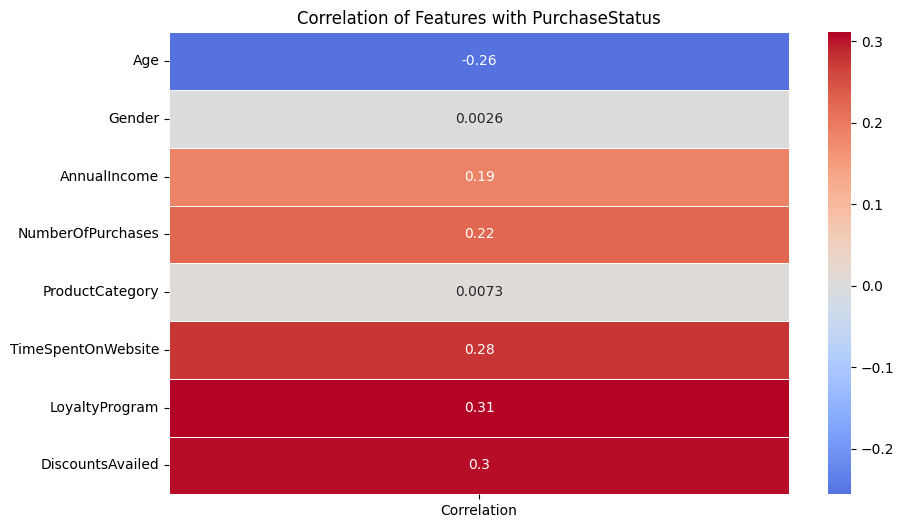

In [7]:
df1 = df.drop(columns=['PurchaseStatus'])

corr_series = df1.corrwith(df['PurchaseStatus'])
corr_matrix = corr_series.to_frame(name='Correlation')


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation of Features with PurchaseStatus')
plt.show()

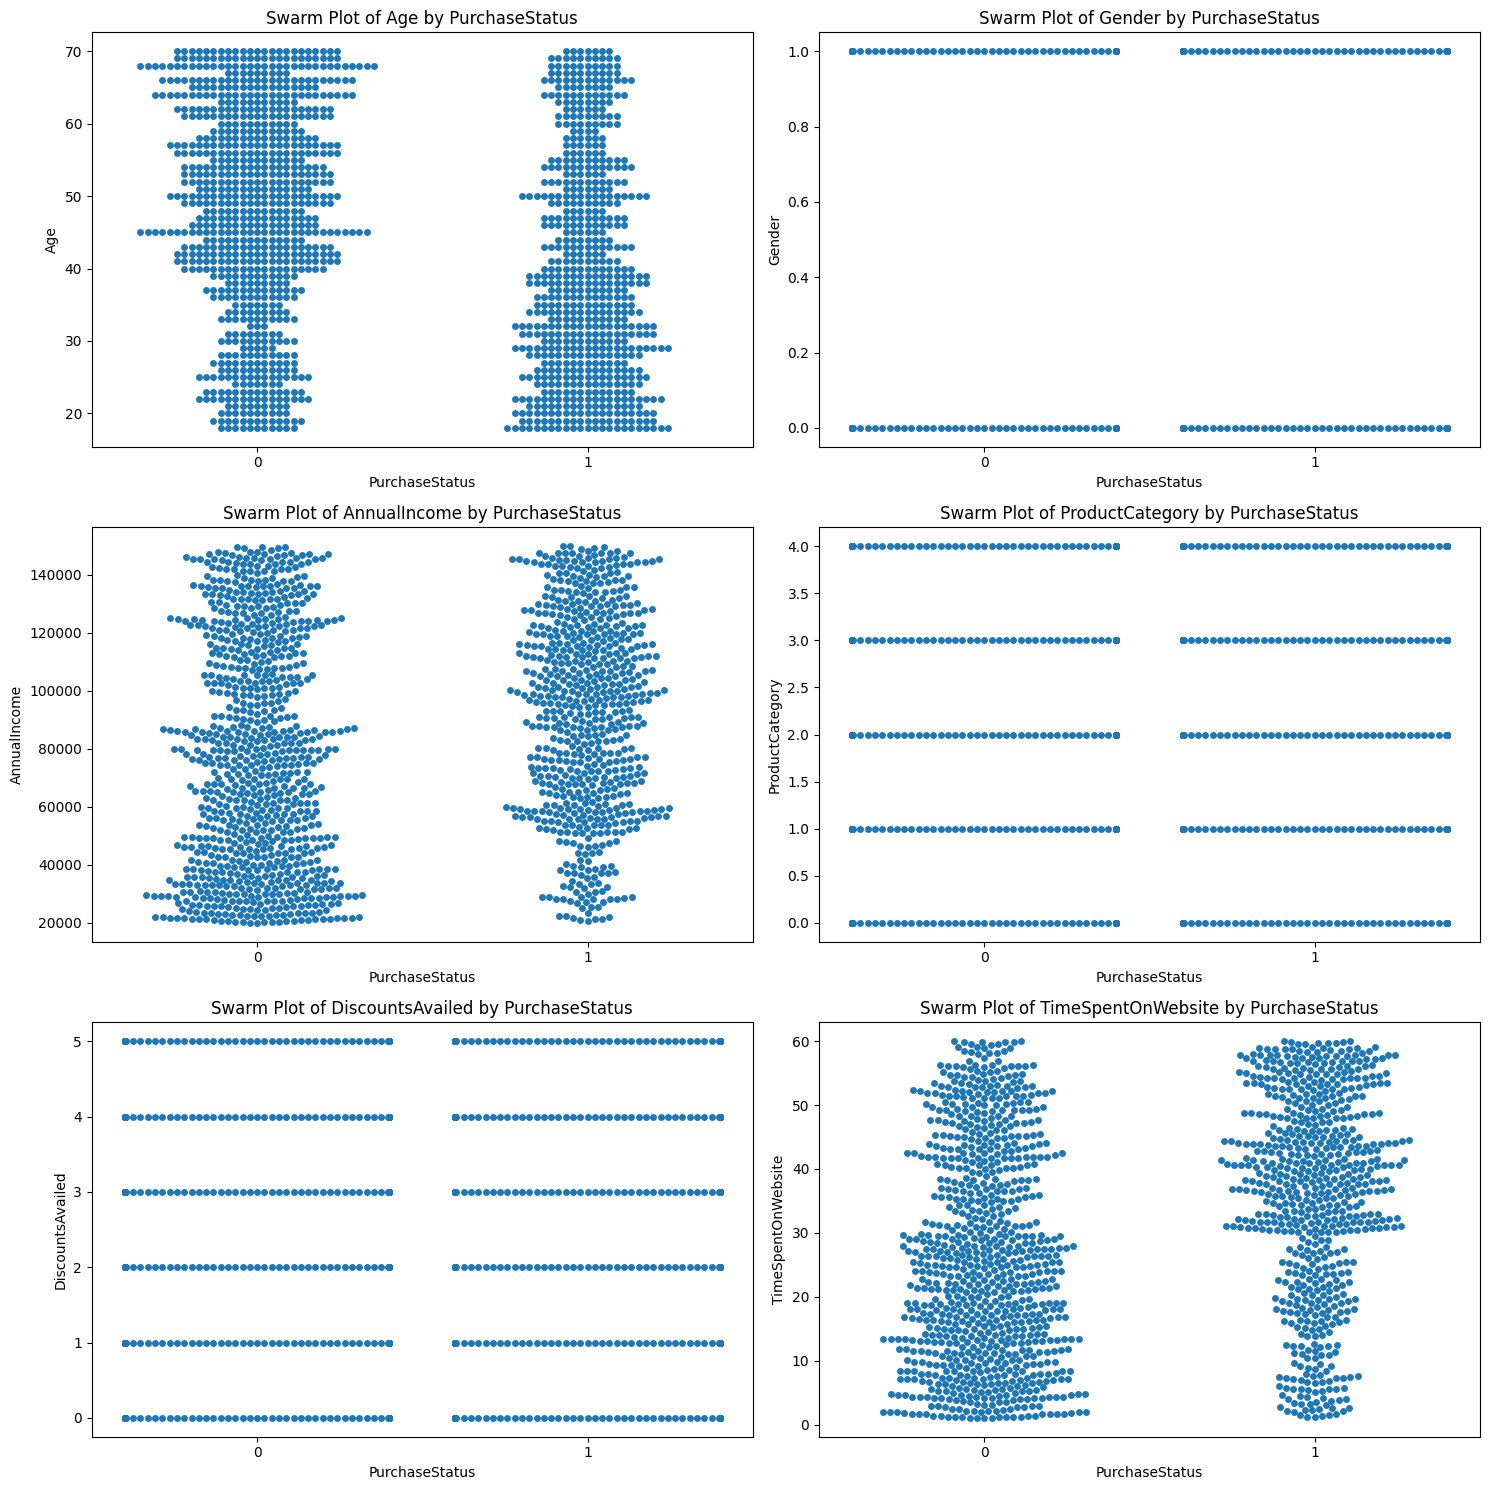

In [8]:

features_to_plot = ['Age', 'Gender', 'AnnualIncome','ProductCategory','DiscountsAvailed','TimeSpentOnWebsite']

num_features = len(features_to_plot)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.swarmplot(x='PurchaseStatus', y=feature, data=df)
    plt.title(f'Swarm Plot of {feature} by PurchaseStatus')

plt.tight_layout()
plt.show()

Above swarm plot shows the distribution of the values with respect to PurchaseStatus

## Splitting of dataset

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['PurchaseStatus']),df['PurchaseStatus'],test_size=0.2,random_state=42)

## Training models

## Gradient Boosting Classifier

In [10]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [11]:
y_pred = gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9433333333333334
[[168   4]
 [ 13 115]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       172
           1       0.97      0.90      0.93       128

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred2 = lr.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


0.7
[[132  40]
 [ 50  78]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       172
           1       0.66      0.61      0.63       128

    accuracy                           0.70       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300



## Decision Tree Classifier

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred4 = dtc.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

0.9033333333333333
[[164   8]
 [ 21 107]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       172
           1       0.93      0.84      0.88       128

    accuracy                           0.90       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300



## Hyperparameter Tuning using RandomizedSearchCV

### Tuning for Gradient Boosting Classifier

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(gbc, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)



In [18]:
random_search.fit(x_train, y_train)
y_pred1 = random_search.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.9466666666666667
[[168   4]
 [ 12 116]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       172
           1       0.97      0.91      0.94       128

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



### Tuning for Logistic Regression

In [28]:
param_grid = {
    'C': [0.1, 1, 10,25],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300,500]
}

random = RandomizedSearchCV(lr, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random.fit(x_train, y_train)
y_pred3 = random.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.84
[[160  12]
 [ 36  92]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       172
           1       0.88      0.72      0.79       128

    accuracy                           0.84       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.85      0.84      0.84       300



### Tuning for Decision Tree Classifier

In [32]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20,25],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,8],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random' ]
}

random_ = RandomizedSearchCV(dtc, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_.fit(x_train, y_train)

y_pred5 = random_.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

0.83
[[151  21]
 [ 30  98]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       172
           1       0.82      0.77      0.79       128

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300

